In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,7)

In [4]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [5]:
test.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,...,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,...,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,...,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,...,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,...,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [24]:
print(train.shape, train.isnull().any().sum())
print(test.shape, test.isnull().any().sum())

(5500, 23) 0
(5952, 22) 0


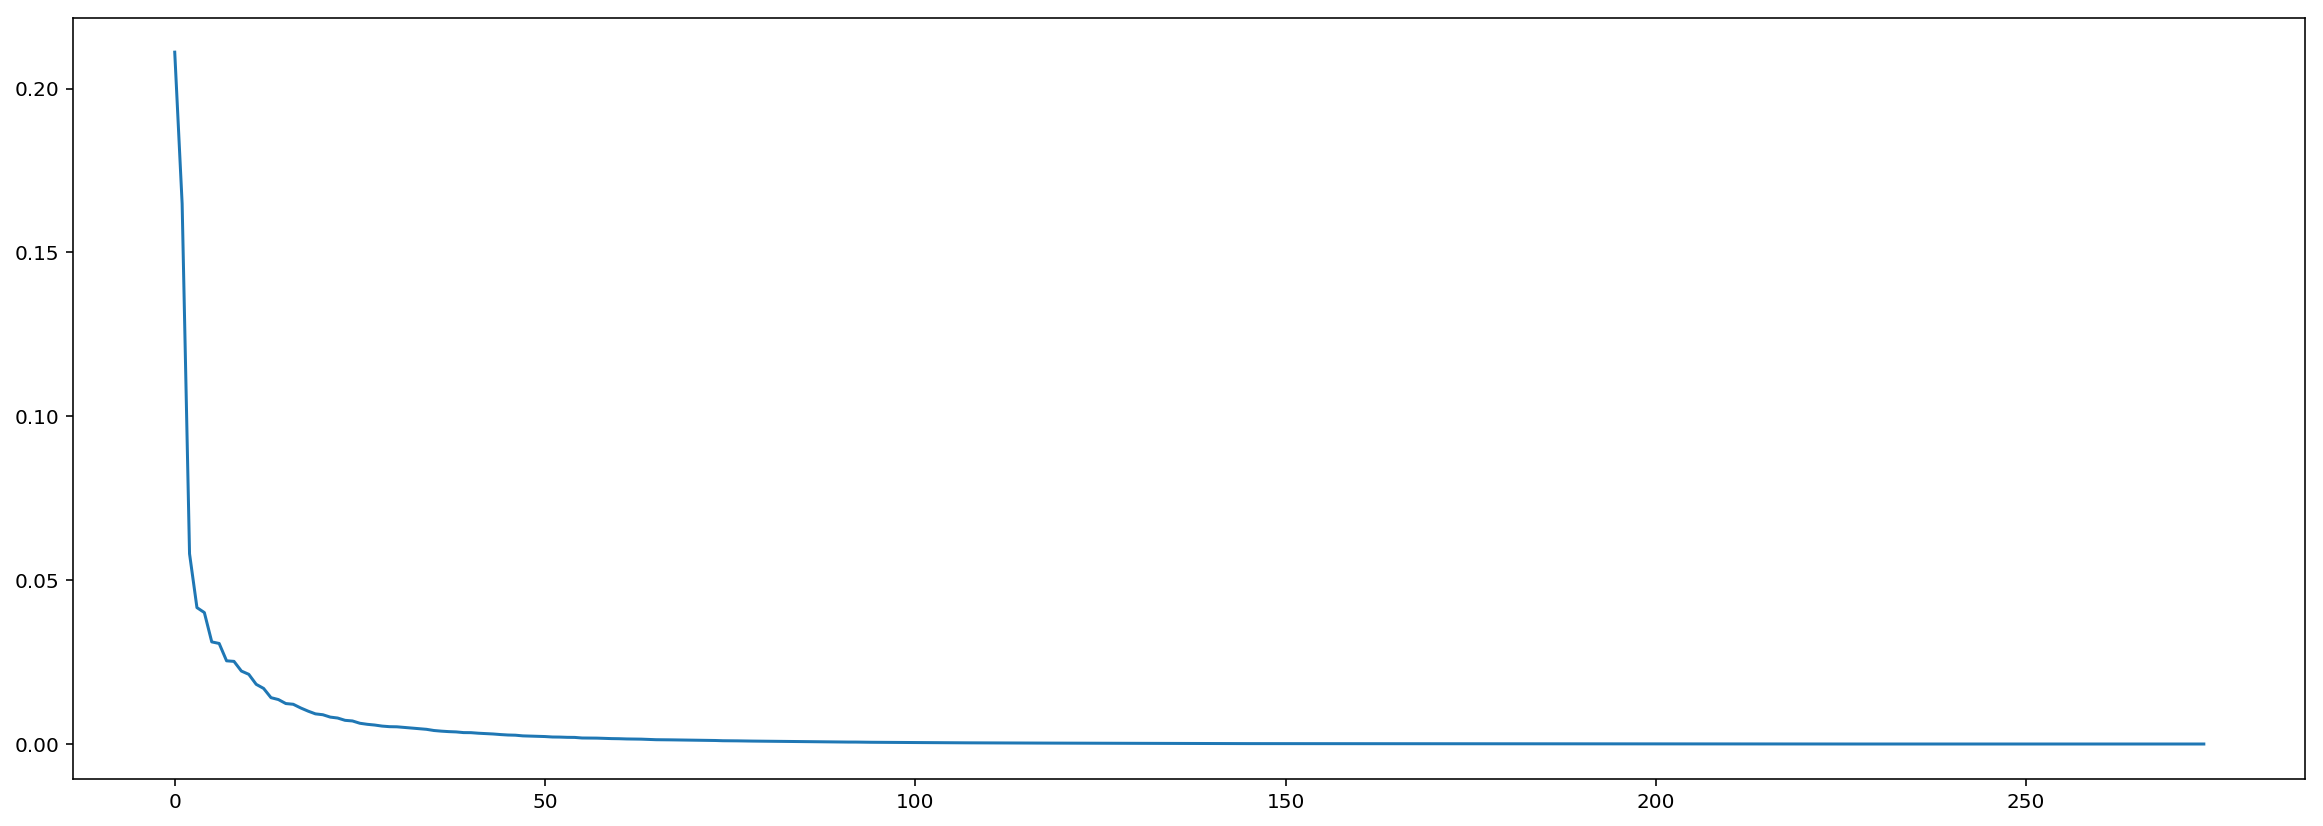

In [157]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(FunctionTransformer(lambda i: i[:,1:]), PolynomialFeatures(include_bias=False), StandardScaler(), PCA()).fit(train)
import seaborn as sns

# ax = plt.subplots(2,1,sharex=True)[1]
# pd.DataFrame(pipe.steps[3][1].components_, columns=pipe.steps[1][1].get_feature_names(train.drop('Choice',1).columns))
#             ).T, ax=ax[0], cbar=False, yticklabels=True)
plt.plot(pipe.steps[3][1].explained_variance_ratio_);

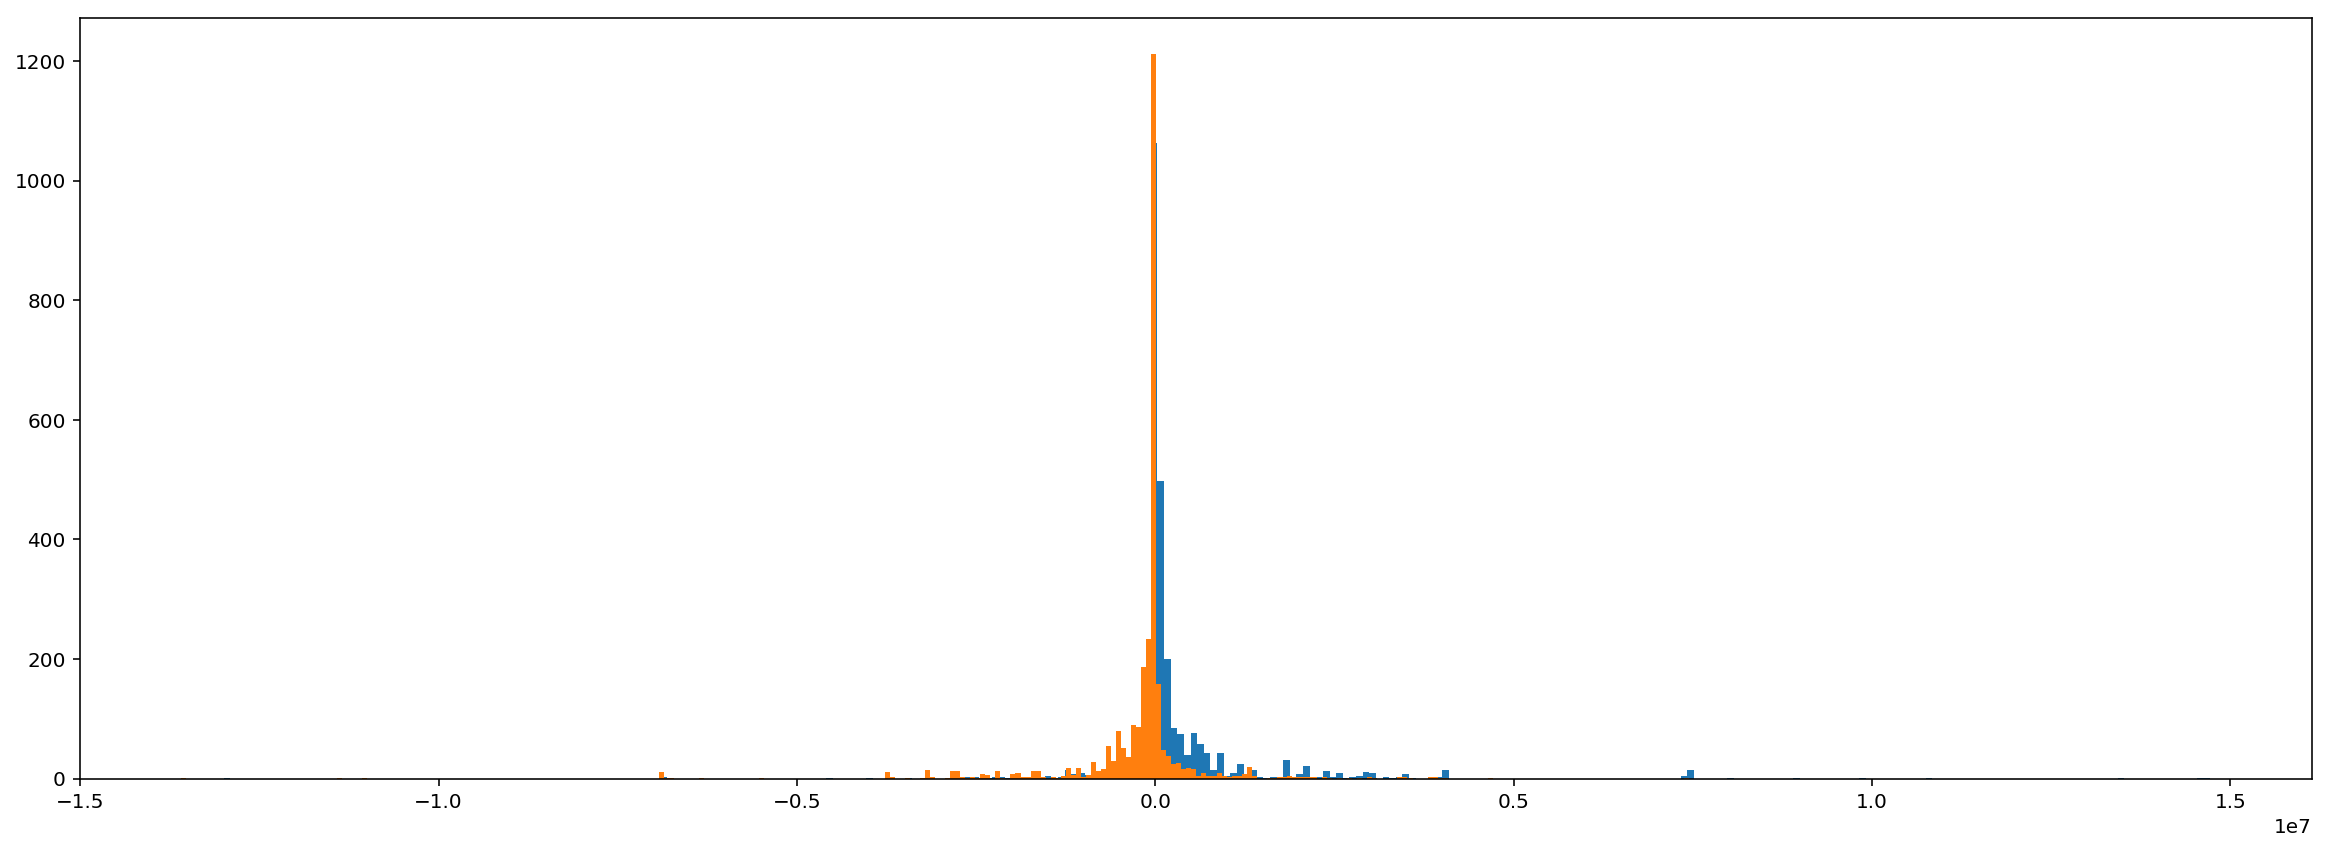

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pipe = make_pipeline(StandardScaler(), LDA()).fit(train.drop('Choice',1), train.Choice)
plt.hist(pipe.steps[1][1].transform(train[train.Choice==0].drop('Choice',1)), bins=300)
plt.hist(pipe.steps[1][1].transform(train[train.Choice==1].drop('Choice',1)), bins=300);

In [141]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [142]:
#label '1' means A is more influential than B. 
#label 0 means B is more influential than A.
#if dif label is positive, choice is closer to 1
#if dif label is negative, choice is closer to 0
def data_transform(x):
    x['dif_follower_count'] = x['A_follower_count']-x['B_follower_count']
    x['dif_following_count'] = x['A_following_count']-x['B_following_count']
    x['dif_listed_count'] = x['A_listed_count']-x['B_listed_count']
    x['dif_mentions_received'] = x['A_mentions_received']-x['B_mentions_received']
    x['dif_retweets_received'] = x['A_retweets_received']-x['B_retweets_received']
    x['dif_mentions_sent'] = x['A_mentions_sent']-x['B_mentions_sent']
    x['dif_retweets_sent'] = x['A_retweets_sent']-x['B_retweets_sent']
    x['dif_posts'] = x['A_posts']-x['B_posts']
    x['dif_network_feature_1'] = x['A_network_feature_1']-x['B_network_feature_1']
    x['dif_network_feature_2'] = x['A_network_feature_2']-x['B_network_feature_2']
    x['dif_network_feature_3'] = x['A_network_feature_3']-x['B_network_feature_3']
    x = x.drop('A_follower_count',1).drop('B_follower_count',1)
    x = x.drop('A_following_count',1).drop('B_following_count',1)
    x = x.drop('A_listed_count',1).drop('B_listed_count',1)
    x = x.drop('A_mentions_received',1).drop('B_mentions_received',1)
    x = x.drop('A_retweets_received',1).drop('B_retweets_received',1)
    x = x.drop('A_mentions_sent',1).drop('B_mentions_sent',1)
    x = x.drop('A_retweets_sent',1).drop('B_retweets_sent',1)
    x = x.drop('A_posts',1).drop('B_posts',1)
    x = x.drop('A_network_feature_1',1).drop('B_network_feature_1',1)
    x = x.drop('A_network_feature_2',1).drop('B_network_feature_2',1)
    x = x.drop('A_network_feature_3',1).drop('B_network_feature_3',1)
    return x

In [3]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('Choice',1), train.Choice, test_size=0.33, random_state=42, stratify=train.Choice)

In [7]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.calibration import calibration_curve
from hyperopt import fmin, hp, Trials, STATUS_OK, tpe
from sklearn.model_selection import cross_val_score
import seaborn as sns
def make_search(estimator, space, n_iters=60):
  return RandomizedSearchCV(estimator, space, n_jobs=-1, cv=StratifiedKFold(5,True,42), random_state=42, n_iter=n_iters, verbose=1)

def search_hp(estimator, space, n_iters=60, trials=None):
#   gotta downgrade networkx to < 2.X to work
  if not trials:
    trials = Trials()
  
  def f(params, X, y):
    print('f')
    estimator = estimator.set_params(params)
    v = cross_val_score(estimator=estimator, X=X, y=y, cv=StratifiedKFold(5,True,42), n_jobs=-1).mean()
    return {'status': STATUS_OK, 'loss': 1 - v, 'model': estimator}
  print(space)
  return fmin(lambda params: f(params, X, y), space=space, algo=tpe.suggest, max_evals=n_iters, trials=trials)#, rstate=np.random.RandomState(42))

def evaluate_model(model, X_train, y_train, X_val, y_val):
  ax = plt.subplots(2,2)[1]
  preds_train = model.predict_proba(X_train)[:,1]
  preds_val = model.predict_proba(X_val)[:,1]
  ax[0,0].set_title('Val Confusion Matrix (Accuracy = {:.1%})'.format(model.score(X_val, y_val)))
  sns.heatmap(confusion_matrix(y_val, preds_val>.5),ax=ax[0,0],annot=True,cbar=False,fmt='d',cmap=plt.cm.Blues)
  ax[0,1].set_title('ROC')
  ax[0,1].plot(*roc_curve(y_train, preds_train)[:2], label='Train AUC = {:.1%}'.format(roc_auc_score(y_train, preds_train)))
  ax[0,1].plot(*roc_curve(y_val, preds_val)[:2], label='Val AUC = {:.1%}'.format(roc_auc_score(y_val, preds_val)))
  ax[0,1].legend()
  ax[1,0].set_title('Precision-Recall')
  ax[1,0].plot(*precision_recall_curve(y_train, preds_train)[:2], label='train')
  ax[1,0].plot(*precision_recall_curve(y_val, preds_val)[:2], label='val')
  ax[1,0].legend()
  ax[1,1].set_title('Calibration')
  ax[1,1].plot(*calibration_curve(y_train, preds_train, n_bins=30), label='train')
  ax[1,1].plot(*calibration_curve(y_val, preds_val, n_bins=30), label='val')
  ax[1,1].legend()
  plt.figure()
  pd.Series(model.best_estimator_.feature_importances_,index=X_val.columns).sort_values().plot.barh(cmap=plt.cm.Blues_r)
#   ax[2,0].set_title('Feature Importances')
  cv = pd.DataFrame(model.cv_results_['params'])
  cv['acc'] = model.cv_results_['mean_test_score']
  ax = plt.subplots(1,len(cv.columns)-1,sharey=True)[1]
  for i, c in enumerate(c for c in cv.columns if c!='acc'):
    if cv[c].dtype=='O': sns.stripplot(x=c,y='acc',data=cv,ax=ax[i])
    else: cv.plot(x=c, y='acc', ax=ax[i], kind='scatter')
  return pd.Series(model.best_params_).rename('Best Params').to_frame()

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


,Best Params
criterion,entropy
max_depth,7
max_features,0.183405
min_samples_split,5
n_estimators,121


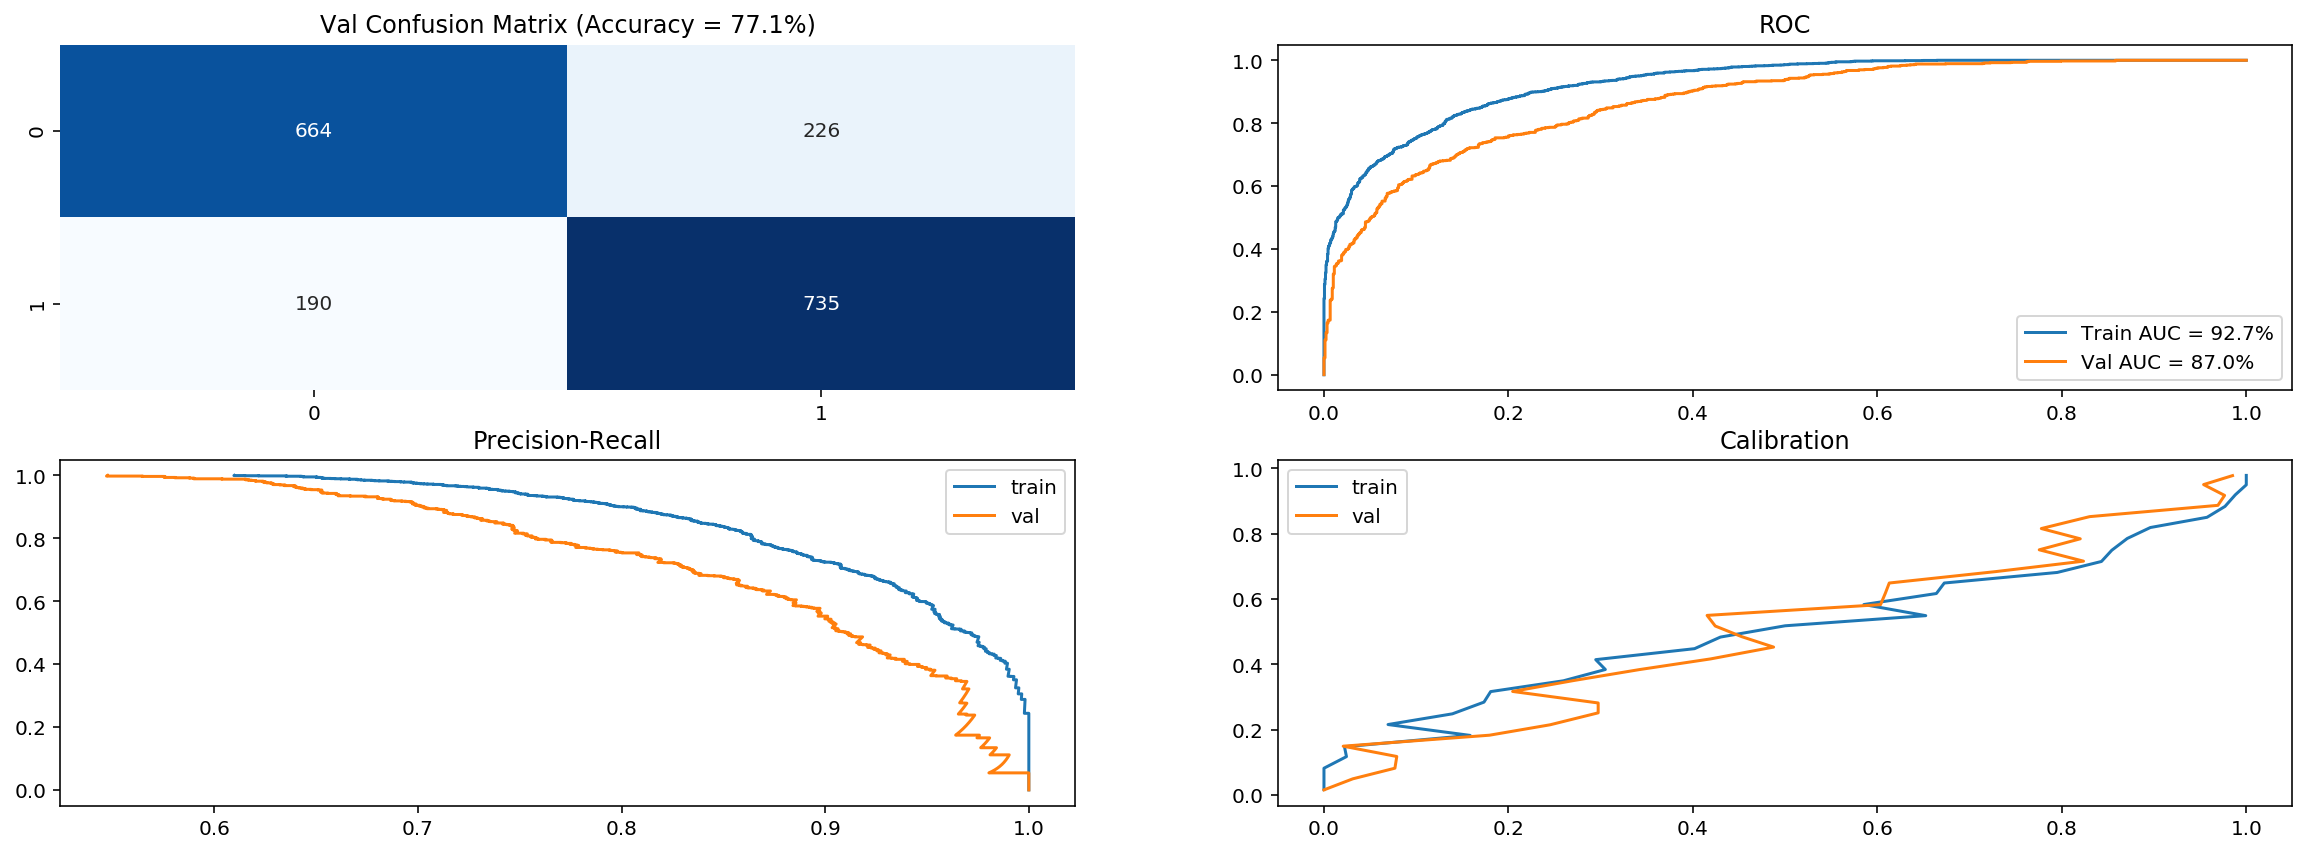

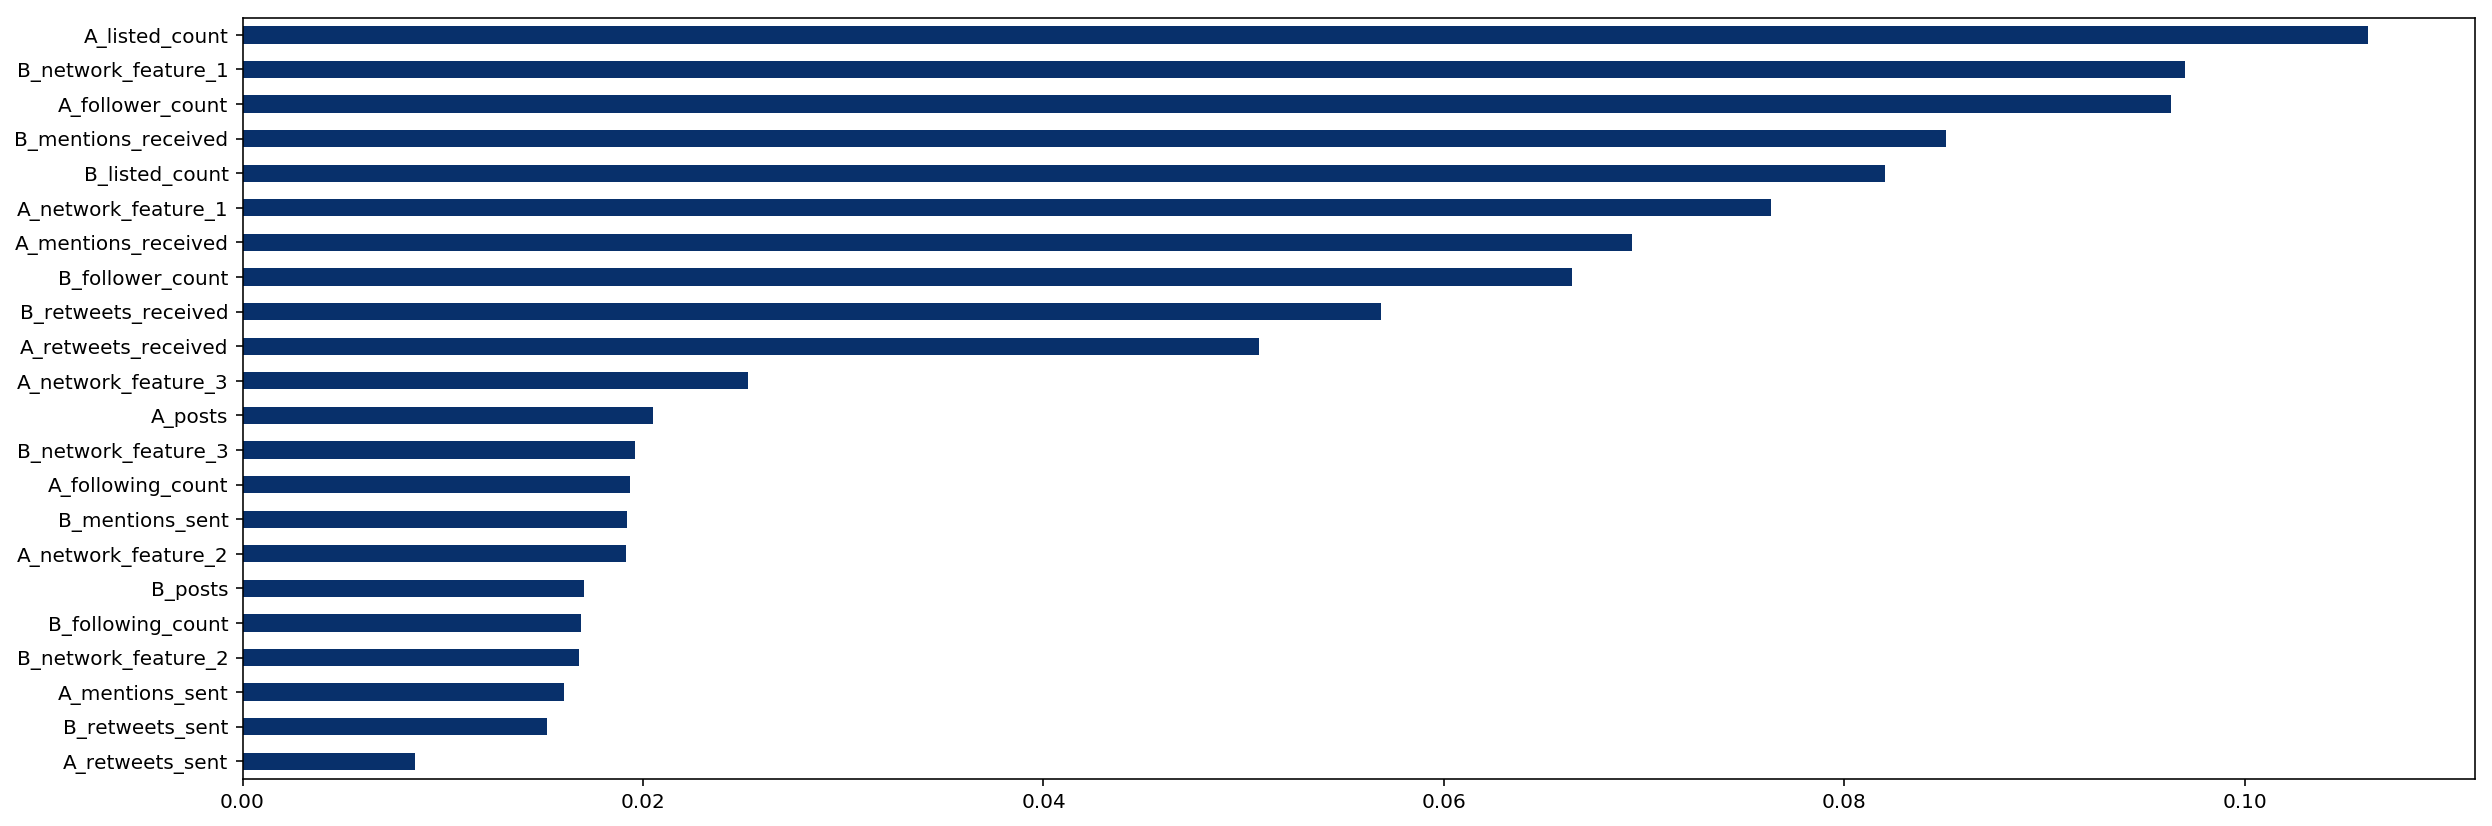

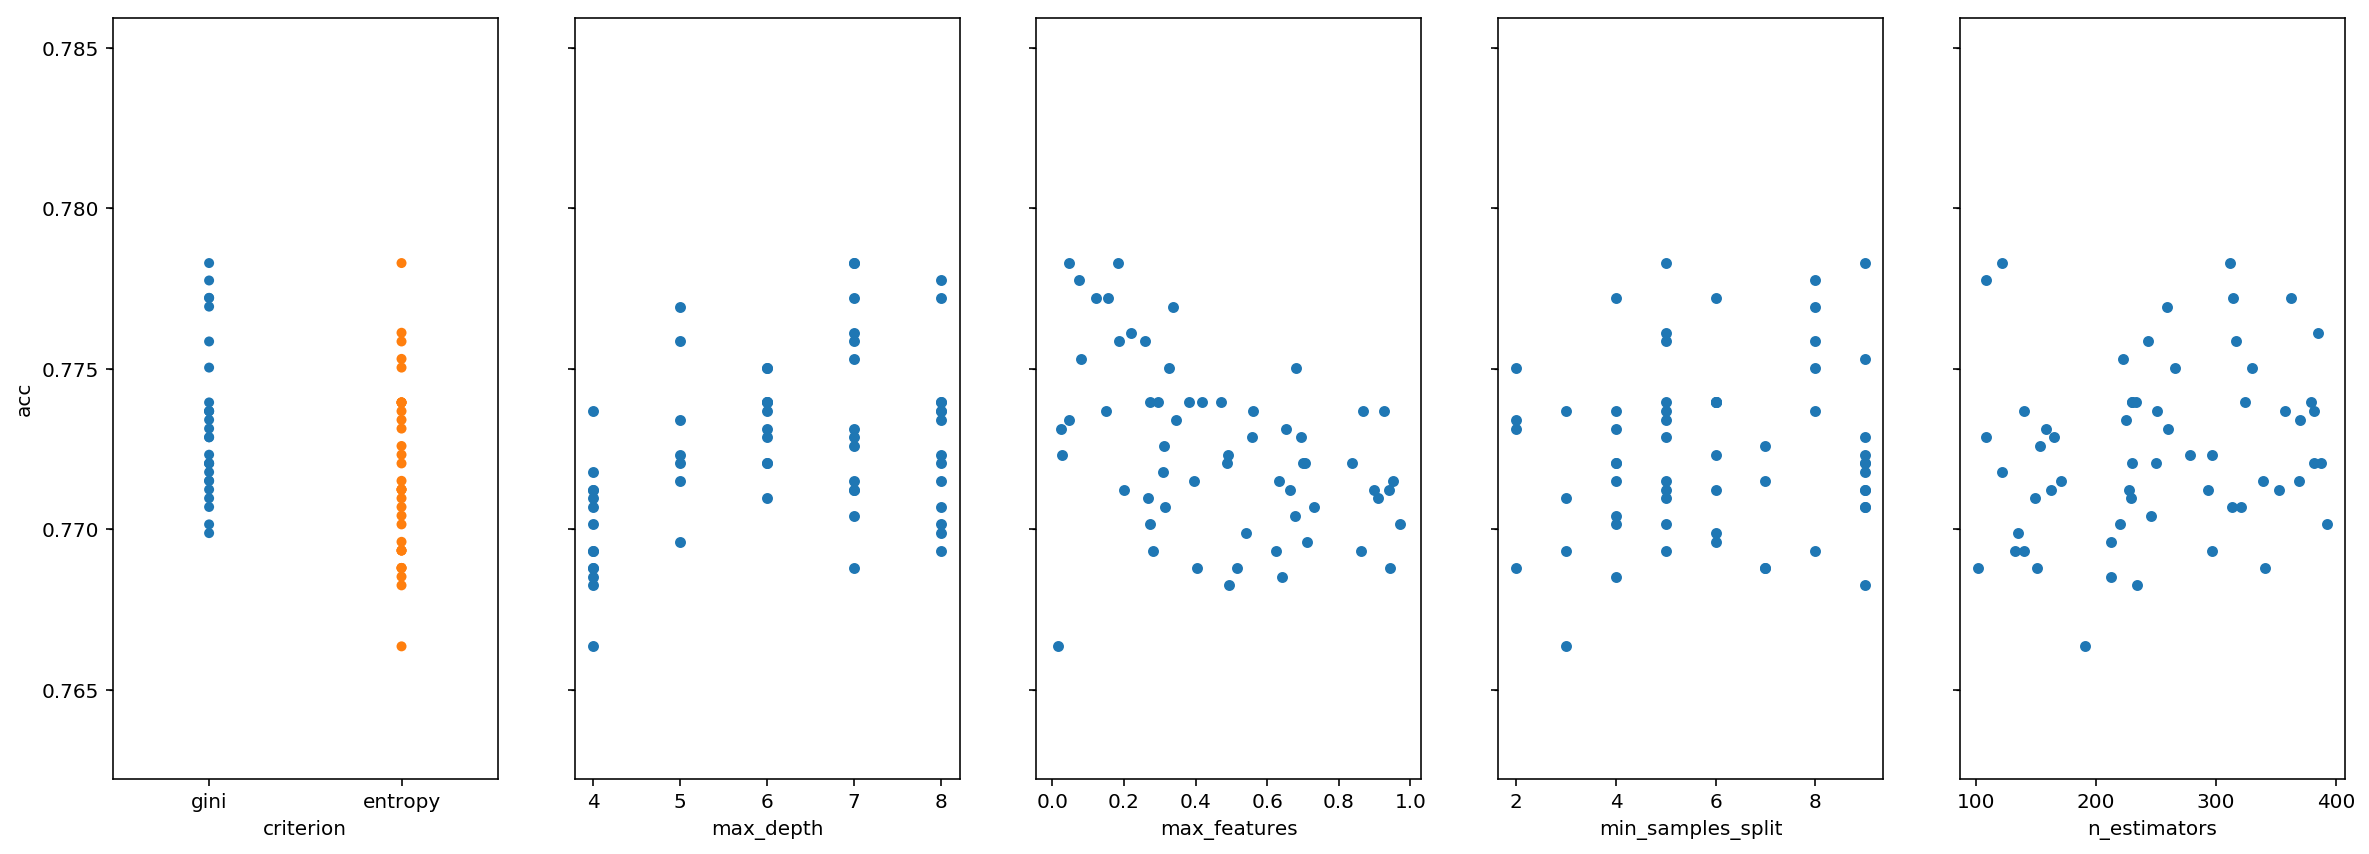

In [12]:
from sklearn.ensemble import RandomForestClassifier as RFC
import scipy.stats as sp

rfc = make_search(
  RFC(random_state=42, n_jobs=1, oob_score=True), #single core is faster
  dict(
    n_estimators=range(100,400),
    max_depth=range(4,9),
    max_features=sp.uniform(),
    criterion=['gini','entropy'],
    min_samples_split=range(2,10)
  ),
  60
).fit(X_train,y_train)
evaluate_model(rfc, X_train, y_train, X_val, y_val)

,Best Params
learning_rate,0.0529751
loss,exponential
max_depth,4
max_features,0.0931028
n_estimators,239
subsample,0.646635


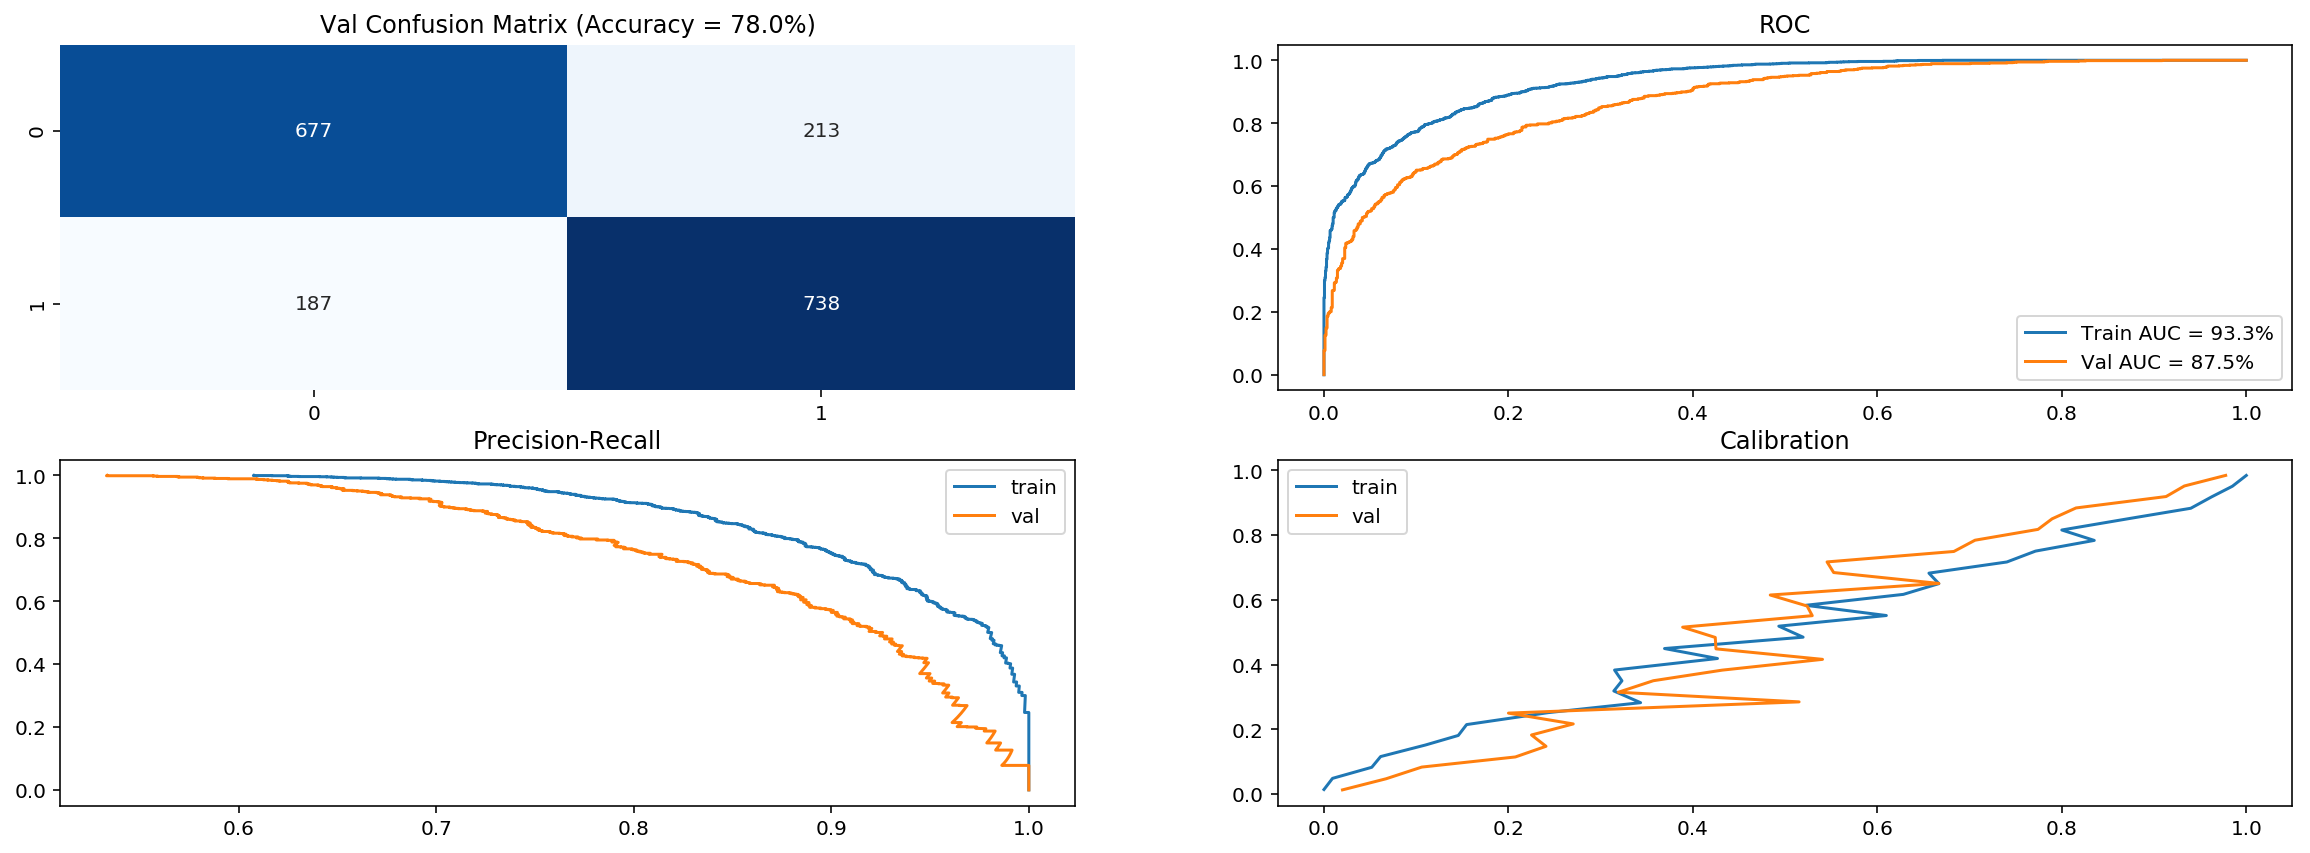

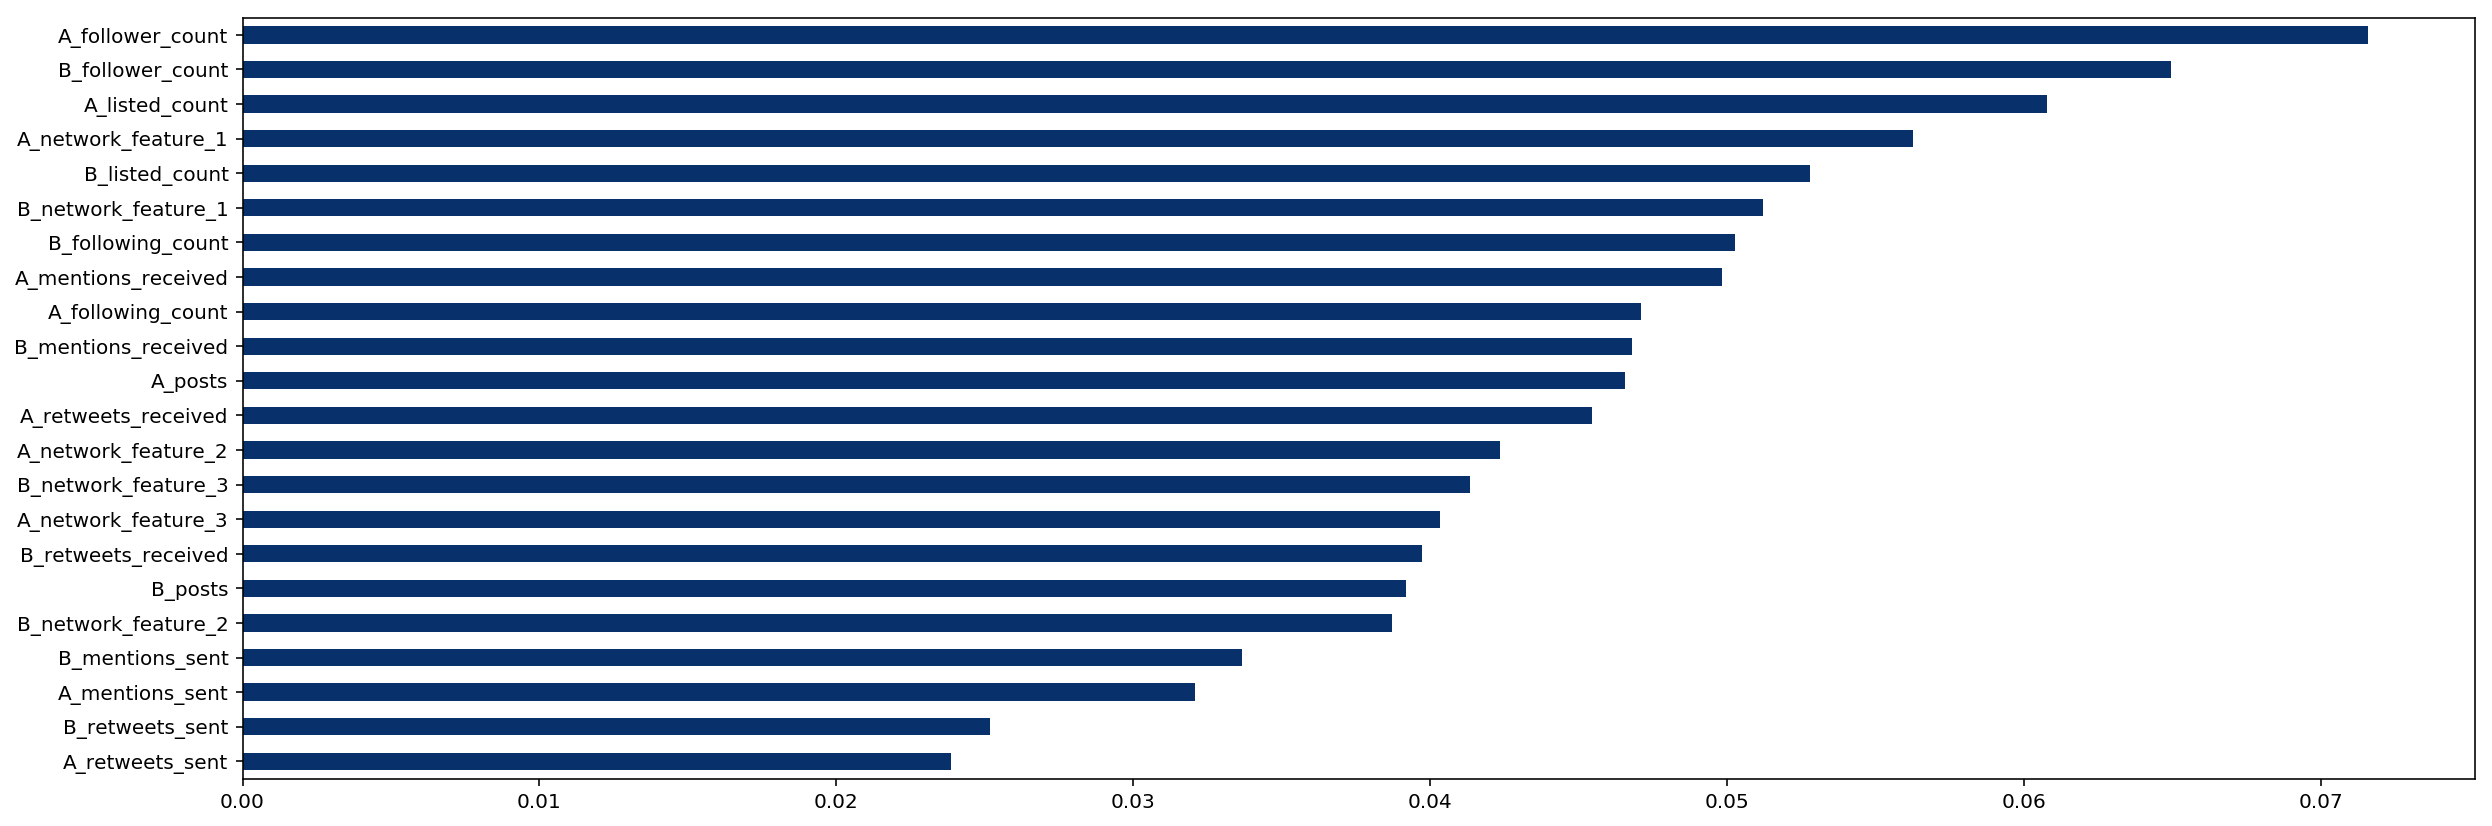

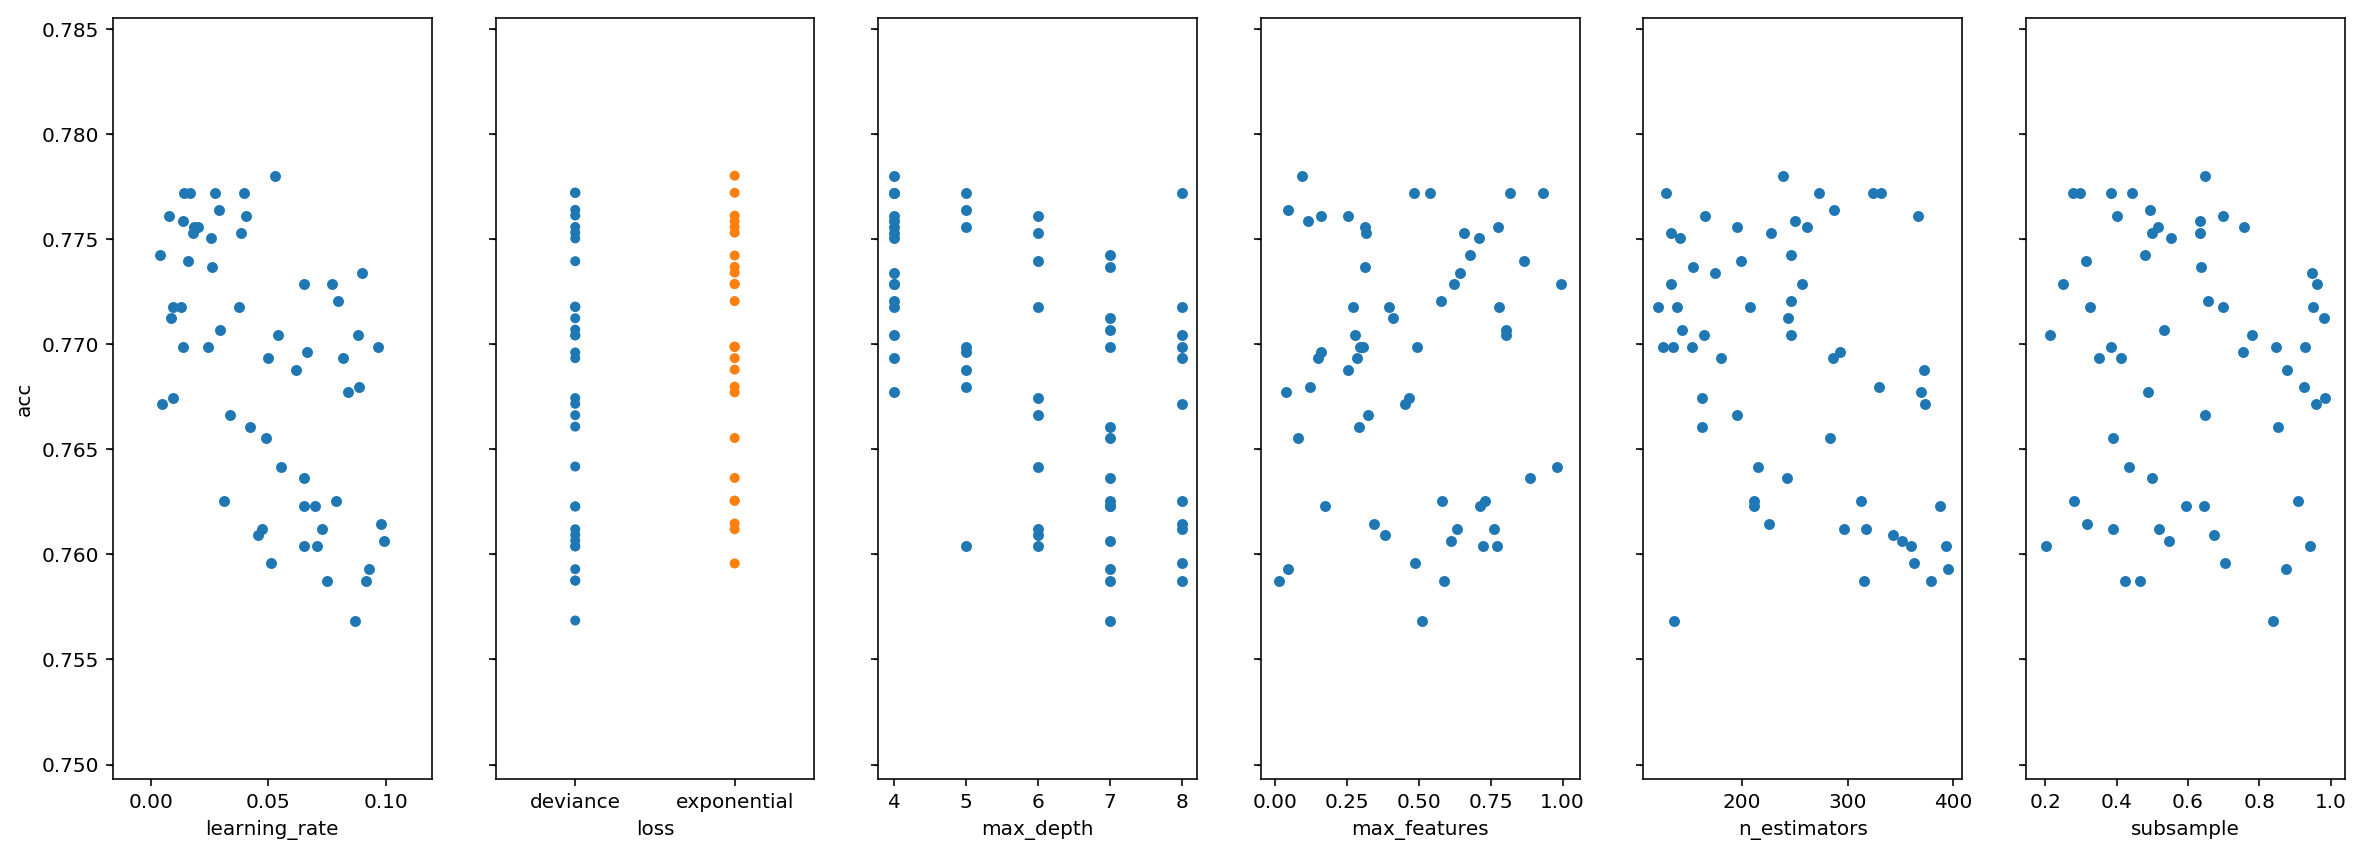

In [14]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = make_search(
  GBC(random_state=42),
  dict(
    loss=['deviance','exponential'],
    learning_rate=sp.uniform(1e-5,.1),
    n_estimators=range(100,400),
    subsample=sp.uniform(.2,.8),
    max_features=sp.uniform(),
    max_depth=range(4,9)
  ),
  60
).fit(X_train,y_train)
evaluate_model(gbc, X_train, y_train, X_val, y_val)

In [18]:
pd.DataFrame({'rfc': rfc.predict_proba(X_train)[:,1],'gbc':gbc.predict_proba(X_train)[:,1]}).corr()

,gbc,rfc
gbc,1.000000,0.973988
rfc,0.973988,1.000000
